# IMT547 - SP19
## Topic: Collecting Twitter Data Demo
### Instructor: Li Zeng (lizeng@uw.edu) - April 17, 2019

### Preparation

In [47]:
# Import the necessary package to process Json data
import json

# Import the twitter library to interact with the Twitter APIs
import twitter
import matplotlib.pyplot as plt

In [48]:
# Your credentials - keep them safe!
# Alternatively, you can load your credential info from a seperate file (safer)
CONSUMER_KEY = 'xmfHc3KZTgAOBMJA0JO5ZwP8q'
CONSUMER_SECRET = '24X15Fqdm1inmNzxc0l8vIMcJ8ds6Re3iyzXAG1x3qu5RNOQU5'
ACCESS_TOKEN = '1089473531631493120-pk1JwMguQuik02EPX063YhTON4ZpW7'
ACCESS_SECRET = 'IyHSWFbnoM2dnK1ubXvl6lwMqmFW6FRBeiH7CTS0yb04K'

In [49]:
# Authenticate with Twitter in OAuth
oauth = twitter.OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

### Streaming API

In [50]:
# Initiate the connection to Twitter Streaming API
twitter_stream = twitter.TwitterStream(auth=oauth)

# Get a sample of the public data following through Twitter
#iterator = twitter_stream.statuses.sample()

# You can also specify filters
# more detail: https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter.html
# and https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters
iterator = twitter_stream.statuses.filter(track= "Trump", language="en")

In [6]:
# Look at one single tweet
next(iterator)

{'created_at': 'Wed Apr 24 17:11:34 +0000 2019',
 'id': 1121099374451277824,
 'id_str': '1121099374451277824',
 'text': 'RT @RepDougCollins: Excited to have President @realDonaldTrump in the peach state today. Families and communities across the nation continu…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1452164484,
  'id_str': '1452164484',
  'name': 'L.H.C Deplorable Dreg',
  'screen_name': 'dilemarocks',
  'location': None,
  'url': None,
  'description': "Faith in Christ, the Great Awakening and all my fellow Patriots! NO LISTS, DM'S,..#MAGA #WWG1WGA #KAG #QANON  #QARMY",
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 8005,
  'friends_count': 8770,
  'listed_count': 0,
  'favourite

In [5]:
# Let's get a few more tweets!
# If you want more, you can get rid of the stop setting
# and let the Twitter API run for days longer
max_count = 10
current_count = 0
collection = []   
for tweet in iterator:
    # get tweet and append it to the collection
    collection.append(tweet)
    # count
    current_count += 1
    if current_count >= max_count:
        break 

In [51]:
# now print our Twitter collection which contains 10 tweets
print("# of the tweets:", len(collection))
# then print out the raw tweets
print(collection)

# of the tweets: 10
[{'created_at': 'Wed Apr 24 18:19:22 +0000 2019', 'id': 1121116435982499840, 'id_str': '1121116435982499840', 'text': "RT @thebradfordfile: Hillary Clinton thinks Trump got special treatment to avoid being indicted.\n\nThat's odd.\n\nTrump associates didn't get…", 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2751254297, 'id_str': '2751254297', 'name': "Cookie x NO DM's", 'screen_name': 'YMcglaun', 'location': 'United States', 'url': None, 'description': "Christian,Conservative,Mother,NaNa, Avid Reader, Military brat, Husband served during Viet Nam war in Navy,Traveled the world, Educated-so don't go there. #MAGA", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 11932, 'friends_count': 

Hard to read? Try to fit the data in a JSON format and use indent to make them more readable

In [9]:
# tweet collection in JSON format
print(json.dumps(collection, indent = 4))

[
    {
        "created_at": "Wed Apr 24 17:11:34 +0000 2019",
        "id": 1121099374333972487,
        "id_str": "1121099374333972487",
        "text": "RT @krassenstein: - Every single Trump admin official that ignores a House Subpoena must be held in contempt \n\n- Every single White House o\u2026",
        "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
        "truncated": false,
        "in_reply_to_status_id": null,
        "in_reply_to_status_id_str": null,
        "in_reply_to_user_id": null,
        "in_reply_to_user_id_str": null,
        "in_reply_to_screen_name": null,
        "user": {
            "id": 30202672,
            "id_str": "30202672",
            "name": "Michael",
            "screen_name": "Boothaler",
            "location": "Maryland",
            "url": null,
            "description": "Enjoy renn faires, highland games, whisky, homebrew beer, SCCA road racing. Army veteran 1974-1980 MOS 31M10, 67N10"

You can store the collected tweets on your local machine

In [10]:
with open("tweet_example.json", "w") as write_file:
    json.dump(collection, write_file, indent = 4)
write_file.close()

## Work with JSON file

In [11]:
data_list = [{"a":1, "b":2}, {"a":3,"b":4}, {"c":6,"d":2}]

In [12]:
# json dump
fout = open("output.json","w")
json.dump(data_list,fout)
# You can also dump the json file in a more readable format. Try it out!
#json.dump(data_list, fout, indent = 4)
fout.close()

In [13]:
# json load
fin = open("output.json","r")
data_list2 = json.load(fin)
fin.close()
data_list2

[{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'c': 6, 'd': 2}]

In [14]:
# Print it using indent argument(Note the difference between json.dump() & json.dumps())
print(json.dumps(data_list2,indent=4))

[
    {
        "a": 1,
        "b": 2
    },
    {
        "a": 3,
        "b": 4
    },
    {
        "c": 6,
        "d": 2
    }
]


### Exericse

Reload the small sample of tweets you just stored in JSON file. Extract only the text field from each tweet and organize the these texts in a list, like:
* ['Today is Tuesday', 'IMT547 is talking about data collection',..., 'I am learning to collect Twitter data']

In [15]:
test = {'text': 1, 'name': 1}
test['text']

1

In [52]:
filehandler = open("tweet_example.json", "r")
allTweets = json.load(filehandler)
tweet_text = []
for item in allTweets:
    tweet_text.append(item['text'])

print(tweet_text)

['RT @krassenstein: - Every single Trump admin official that ignores a House Subpoena must be held in contempt \n\n- Every single White House o…', 'RT @itsJeffTiedrich: hey, remember when Trump restored honor and dignity to the White House? me neither, but I do remember when the fragile…', 'RT @Acosta: ‘If this is the new normal, I want no part of it’: Citing Trump, Iowa’s longest-serving Republican leaves party https://t.co/Gz…', 'RT @WilDonnelly: Trump’s new impeachment strategy has just one problem - it was devised by an ignorant moron. In 1993 SCOTUS ruled that the…', 'RT @TulsiGabbard: Trump/Pence continue to try to hide the truth from their Christian supporters--the terrorist attacks on Christians/Christ…', 'RT @BlueSade7: @jack @realDonaldTrump @WhiteHouse @Twitter Start the civility lesson with Trump!', 'RT @RepMaxineWaters: I received some criticism b/c I said Repubs supporting Trump -after his crimes &amp; work w/ Russians - are unpatriotic. Y…', 'RT @realDonaldTrump: Rep. Al

## Search Historical Tweets - Search API

In [53]:
# Initiate the connection to Twitter REST API
twitter = twitter.Twitter(auth=oauth)
            
# Search for latest tweets about "#marvel"
twitter.search.tweets(q='#marvel')

{'statuses': [{'created_at': 'Wed Apr 24 22:48:59 +0000 2019',
   'id': 1121184289985572865,
   'id_str': '1121184289985572865',
   'text': 'RT @AymericAulen: CONCOURS 🎁 | C’est le moment de l’affrontement final... quoi qu’il en coûte ! 💥\n\nÀ l’occasion de la sortie dans nos salle…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'AymericAulen',
      'name': 'Aymeric Aulen 🍿',
      'id': 241250196,
      'id_str': '241250196',
      'indices': [3, 16]}],
    'urls': []},
   'metadata': {'iso_language_code': 'fr', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1116207462829514752,
    'id_str': '1116207462829514752',
    'name': 'Spaggiari',
    'screen

In [19]:
# Be aware of rate limit: 
# more detail: https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets
twitter.search.tweets(q='#marvel', result_type='recent', lang='en', count=20)

{'statuses': [{'created_at': 'Wed Apr 24 17:46:46 +0000 2019',
   'id': 1121108233945411584,
   'id_str': '1121108233945411584',
   'text': 'RT @HuluWatcherFS: 10 Best #Superhero Shows Currently Streaming on #Hulu. #Marvel #DC #AvengersEndgame @hulu @FanSided https://t.co/HJs7f2F…',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'Superhero', 'indices': [27, 37]},
     {'text': 'Hulu', 'indices': [67, 72]},
     {'text': 'Marvel', 'indices': [74, 81]},
     {'text': 'DC', 'indices': [82, 85]},
     {'text': 'AvengersEndgame', 'indices': [86, 102]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'HuluWatcherFS',
      'name': 'Hulu Watcher',
      'id': 4764067634,
      'id_str': '4764067634',
      'indices': [3, 17]},
     {'screen_name': 'hulu',
      'name': 'hulu',
      'id': 15033883,
      'id_str': '15033883',
      'indices': [103, 108]},
     {'screen_name': 'FanSided',
      'name': 'FanSided',
      'id': 17268437,
      'id_str': '17268437',
      

## Discover trends based on locations

API doc: https://developer.twitter.com/en/docs/trends/locations-with-trending-topics/api-reference/get-trends-available

In [54]:
# Get all the locations where Twitter provides trends service
locations_info = twitter.trends.available(_woeid=1)

In [55]:
locations_info

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

#### United States - Country Level
{u'country': u'United States',
  u'countryCode': u'US',
  u'name': u'United States',
  u'parentid': 1,
  u'placeType': {u'code': 12, u'name': u'Country'},
  u'url': u'http://where.yahooapis.com/v1/place/23424977',
  u'woeid': 23424977}
  
#### United States - Town Level
 {u'country': u'United States',
  u'countryCode': u'US',
  u'name': u'Seattle',
  u'parentid': 23424977,
  u'placeType': {u'code': 7, u'name': u'Town'},
  u'url': u'http://where.yahooapis.com/v1/place/2490383',
  u'woeid': 2490383}
  
A WOEID is a Yahoo! Where On Earth ID

API doc: https://developer.twitter.com/en/docs/trends/locations-with-trending-topics/api-reference/get-trends-available

In [56]:
# Get trending topics in Seattle
seattle_trends = twitter.trends.place(_id = 2490383)

In [58]:
print(json.dumps(seattle_trends, indent=4))

[
    {
        "trends": [
            {
                "name": "Felix",
                "url": "http://twitter.com/search?q=Felix",
                "promoted_content": null,
                "query": "Felix",
                "tweet_volume": 66282
            },
            {
                "name": "#MUNMCI",
                "url": "http://twitter.com/search?q=%23MUNMCI",
                "promoted_content": null,
                "query": "%23MUNMCI",
                "tweet_volume": 145437
            },
            {
                "name": "#WOLARS",
                "url": "http://twitter.com/search?q=%23WOLARS",
                "promoted_content": null,
                "query": "%23WOLARS",
                "tweet_volume": 48805
            },
            {
                "name": "De Gea",
                "url": "http://twitter.com/search?q=%22De+Gea%22",
                "promoted_content": null,
                "query": "%22De+Gea%22",
                "tweet_volume": 70066
       

## Collect data about Twitter Users

#### Users Follower & Friends
Potential for social network analysis on Twitter!

API Doc: 
* Followers: https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-followers-ids
* Friends: https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-friends-ids

In [8]:
# Retrieve some of Donald Trump's followers ids
twitter.followers.ids(screen_name="realDonaldTrump", count = 10)

{'ids': [2558962367,
  1121114450466152450,
  2173282129,
  1121115932867350529,
  813921432287805441,
  1099861398069350400,
  389154781,
  1121082764965613568,
  1121116086504652802,
  1121116324766179328],
 'next_cursor': 1631720626341506513,
 'next_cursor_str': '1631720626341506513',
 'previous_cursor': 0,
 'previous_cursor_str': '0',
 'total_count': None}

In [25]:
# Retrieve some of Donald Trump's friends ids
twitter.friends.ids(screen_name="realDonaldTrump")

{'ids': [208155240,
  818910970567344128,
  2353605901,
  17685258,
  818927131883356161,
  22703645,
  56561449,
  822215673812119553,
  823367015830323201,
  471672239,
  20733972,
  322293052,
  720293443260456960,
  2325495378,
  245963716,
  50769180,
  22203756,
  729676086632656900,
  14669951,
  475802156,
  75541946,
  41634520,
  4121225056,
  2908170952,
  34852681,
  25429371,
  15513604,
  108471631,
  246500501,
  14839147,
  316865635,
  26829777,
  1222639789,
  620571475,
  633797941,
  726414091,
  82504071,
  48223726,
  1013672084,
  29562422,
  39349894,
  23970102,
  16031927,
  216299334,
  39344374,
  52544275],
 'next_cursor': 0,
 'next_cursor_str': '0',
 'previous_cursor': 0,
 'previous_cursor_str': '0',
 'total_count': None}

#### Users Timeline
API Doc: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline

In [9]:
twitter.statuses.user_timeline(screen_name="realDonaldTrump", count = 3)

[{'created_at': 'Wed Apr 24 16:54:54 +0000 2019',
  'id': 1121095181690974208,
  'id_str': '1121095181690974208',
  'text': 'Rep. Alexandria Ocasio-Cortez is correct, the VA is not broken, it is doing great. But that is only because of the… https://t.co/2XHTS0gNl9',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/2XHTS0gNl9',
     'expanded_url': 'https://twitter.com/i/web/status/1121095181690974208',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [116, 139]}]},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 25073877,
   'id_str': '25073877',
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump',
   'location': 'Washington, DC',
   'descript

### Check Rate Limit

In [59]:
twitter.application.rate_limit_status()

{'rate_limit_context': {'access_token': '1089473531631493120-pk1JwMguQuik02EPX063YhTON4ZpW7'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1556147078},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1556147078},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1556147078},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1556147078},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1556147078},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1556147078},
   '/lists/ownerships': {'limit': 15, 'remaining': 15, 'reset': 1556147078},
   '/lists/subscribers': {'limit': 180, 'remaining': 180, 'reset': 1556147078},
   '/lists/members/show': {'limit': 15, 'remaining': 15, 'reset': 1556147078},
   '/lists/statuses': {'limit': 900, 'remaining': 900, 'reset': 1556147078}},
  'application': {'/application/rate_limit_status': {'limit': 180,
    'remaining': 179,
    '

### Exercise

Collect the recent 100 Twitter posts from a celebrity of interest. What is your strategy to figure out what these posts are talking about? 

Tips: for preliminary analysis, you can look at hashtags and word frequency. It is also great to create a visualization to aid your analysis (e.g. word cloud as I showed last week for the class background survey)

**Answer: My strategy is to find all the hashtags from the 100 twitter posts and then find the count of each of the hashtags. Then I will make a frequency plot to visualize the data.**

In [27]:
alltweettexts = []

#get 100 recent tweets from Robert Downey Junior
recent_tweets_from_IRONMAN = twitter.statuses.user_timeline(screen_name= "RobertDowneyJr", language="en", count=100)
for tweet in recent_tweets_from_IRONMAN:
    alltweettexts.append(tweet)

    

#extracting the hastags from the tweets
hashtags = []
for eachtweet in alltweettexts:
    hashtagList = eachtweet["entities"]["hashtags"]
    if len(hashtagList) > 0:
        for hashtag in hashtagList:
            hashtags.append(hashtag)

#creating the frequency of hashtags
hashtagDictionary = dict()
for hashtag in hashtags:
    keyval = hashtag["text"]
    hashtagDictionary[keyval] = hashtagDictionary.get(keyval, 0) + 1




{'Endgame': 1, 'AvengersEndgame': 2, 'Avenger': 1, 'ChefsForFeds': 1, 'HurricaneFlorence': 1, 'InfinityWar': 11, 'poweredbybreakfast': 1, 'TeenTitansGOMovie': 1, 'Happy4th': 1, 'USA': 1, 'LaylowGolborne': 1, 'brianortegafoundation': 1, 'ThanosDemandsYourSilence': 1, 'TheVoyageofDoctorDolittle': 1, 'EmmaThompson': 1, 'gomadforrohhad': 1, 'happystpaddysday': 1, 'Avengers': 1, 'HeroActs': 1, 'Marvel': 1, 'IronMan': 1, 'iTunes': 1, 'ManOfPeace': 1, 'VeteransDay': 1, 'HappyHalloween': 1}


In [29]:
print(json.dumps(hashtagDictionary, indent = 4))

{
    "Endgame": 1,
    "AvengersEndgame": 2,
    "Avenger": 1,
    "ChefsForFeds": 1,
    "HurricaneFlorence": 1,
    "InfinityWar": 11,
    "poweredbybreakfast": 1,
    "TeenTitansGOMovie": 1,
    "Happy4th": 1,
    "USA": 1,
    "LaylowGolborne": 1,
    "brianortegafoundation": 1,
    "ThanosDemandsYourSilence": 1,
    "TheVoyageofDoctorDolittle": 1,
    "EmmaThompson": 1,
    "gomadforrohhad": 1,
    "happystpaddysday": 1,
    "Avengers": 1,
    "HeroActs": 1,
    "Marvel": 1,
    "IronMan": 1,
    "iTunes": 1,
    "ManOfPeace": 1,
    "VeteransDay": 1,
    "HappyHalloween": 1
}


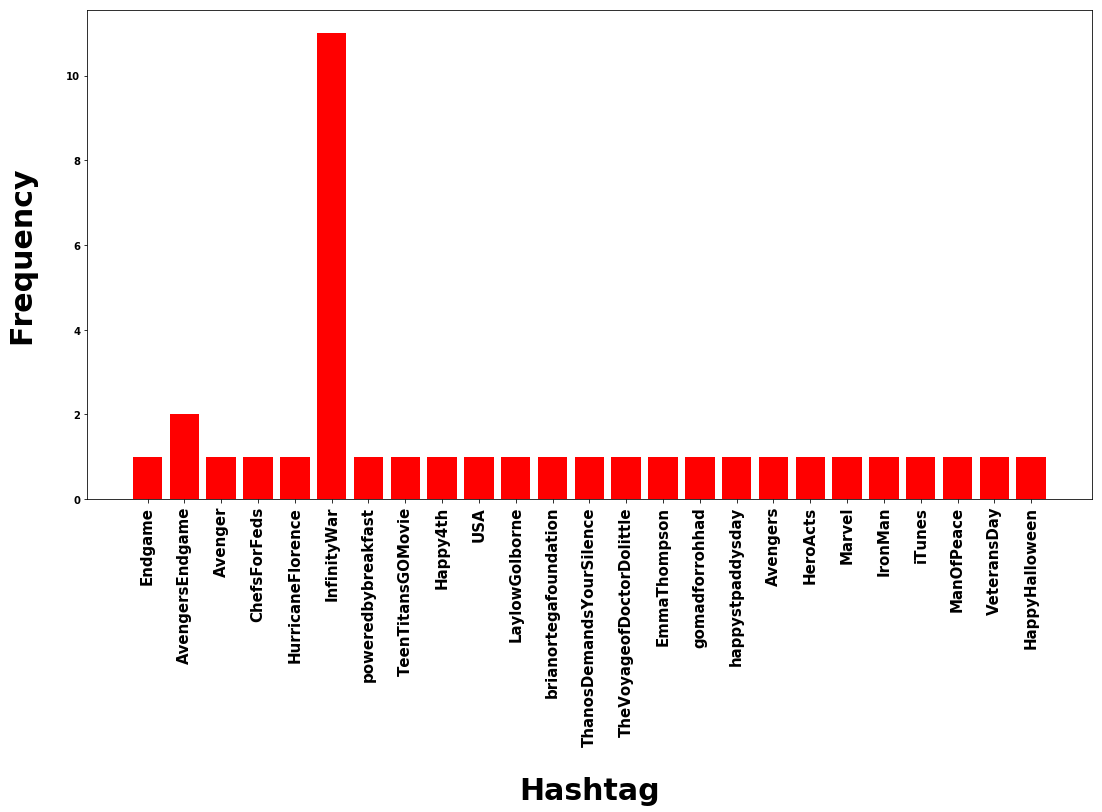

In [69]:
#plot
plt.figure(figsize=(18,9))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.bar(range(len(hashtagDictionary)), list(hashtagDictionary.values()), align='center' , color='red')
plt.xticks(range(len(hashtagDictionary)), list(hashtagDictionary.keys()), rotation='vertical', fontsize = 15)
plt.xlabel("Hashtag", fontsize=30, labelpad= 30, color="black")
plt.ylabel("Frequency", fontsize=30, labelpad= 30, color="black")
plt.show()